# C-SVM Regression Frank wolfe Optimizer scratch

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from scipy.optimize import linprog
import matplotlib.pyplot as plt

 ## Mathematical model of C-SVM Regression

<img src="svr.png" width="500px" height="250px" >

In [2]:
#We will not use this function ,it's juste for explaining 
def objec_func(parmtrs):
    return (np.dot(parmtrs[0:d],parmtrs[0:d].T))/2+C*sum(parmtrs[d+1:d+2*n+1])

## Frank and wolf Algorithm

<img src="fw1.png" width="500px" height="500px" >

In [3]:
#this function used to find a first initial solution is simplex problem
def first_point(X):
    n,d=X.shape
    A=np.concatenate((-1*X,X), axis=0)
    A=np.insert(A,len(A[1]),1, axis=1)
    list1=[]
    for i in range(0,2*n):
                line=np.zeros(2*n)
                line[i]=-1
                list1.append(line)
    A=np.concatenate((A,np.array(list1)), axis=1)
    A=np.insert(A,len(A[1]),0, axis=1)
    A[0][2*n+d+1]=1
    c=np.zeros(2*n+d+1)
    c=np.append(c,1)
    B=np.concatenate((ep-y,ep+y), axis=0)
    none_bound=[(None,None) for i in range(0,d+1)]
    bound=[(0,None) for i in range(0,2*n+1)]
    bounds1=np.concatenate((none_bound,bound), axis=0)                               
    res = linprog(c, A_ub=A, b_ub=B, bounds=bounds1,method='interior-point')
    x=np.array(res['x'])
    return x[0:2*n+d+1]

In [37]:
#this function implement frank and walf algorithm 
def frank_walf_svr(X,y,ep,C,n_iter):
    parameters=first_point(X)
    n,d=X.shape
    for k in range(0,n_iter):
        # get gradient of objective function 
        parameters1=parameters
        parameters1[d]=0
        list_one=np.ones(2*n)
        grad=np.concatenate((parameters1[0:d+1],C*list_one) ,axis=0)
        A=np.concatenate((-1*X,X), axis=0)
        A=np.insert(A,len(A[1]),1, axis=1)
        list1=[]
        for i in range(0,2*n):
            line=np.zeros(2*n)
            line[i]=-1
            list1.append(line)
        A=np.concatenate((A,np.array(list1)), axis=1)
        c = grad
        B=np.concatenate((ep-y,ep+y), axis=0)
        none_bound=[(None,None) for i in range(0,d+1)]
        bound=[(0,None) for i in range(0,2*n)]
        bounds1=np.concatenate((none_bound,bound), axis=0)                               
        res = linprog(c, A_ub=A, b_ub=B, bounds=bounds1,method='simplex')
        res=np.array(res['x'])
        dparameters = res-parameters
        lr=2/(2+k)
        parameters = parameters + lr* dparameters 
        print("Iteration",k)
    return parameters[0:d],parameters[d]
       

# Data

In [46]:
X, y= make_regression(n_samples=1000, n_features=1,noise=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

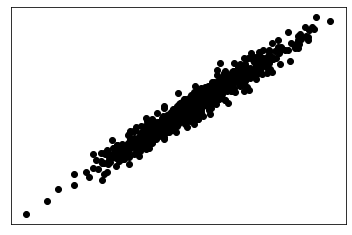

In [47]:
plt.scatter(X_train, y_train,color='black')
plt.xticks(())
plt.yticks(())
plt.show()

## Training

In [48]:
ep, C, n_iter = 0.0001, 1, 10

In [49]:
w,b=frank_walf_svr(X, y, ep, C, n_iter)

/home/said/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


## Model visualization

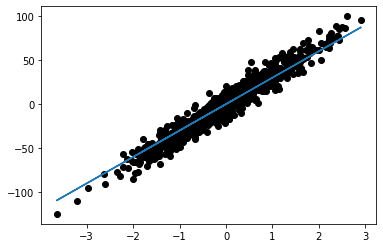

In [50]:
y=np.dot(X_train,w.T)+b
plt.scatter(X_train, y_train,color='black')
plt.plot(X_train,y)
plt.show()

## Save model

In [51]:
np.save('Optimal_wr',w)
np.save('Optimal_br',b)

## Load model

In [52]:
w=np.load('Optimal_wr.npy')
b=np.load('Optimal_br.npy')

## Model evaluation 

In [53]:
from sklearn.metrics import r2_score
y_pred=[]
for i in range (X_test.shape[0]):
    y_hat=np.dot(w,X_test[i])+b
    y_pred.append(y_hat)
print(r2_score(y_test, y_pred))

0.9301430189782431
